In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import math

In [47]:
new_chi_data = pd.read_csv('transformed_data.csv', index_col=0)
new_chi_data.columns

Index(['bus', 'rail_boardings', 'total_rides', 'is_sat', 'is_holi',
       'avg_precip', 'temp_mid', 'temp_rng', 'temp_bs', 'hum_mid', 'hum_rng',
       'wind_mid', 'wind_rng', 'pres_mid', 'pres_rng'],
      dtype='object')

Text(0, 0.5, 'Predictions')

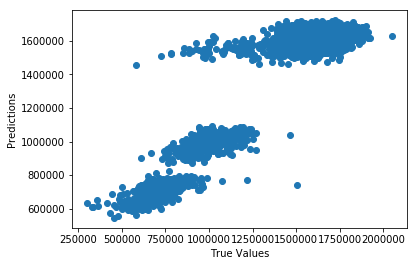

In [48]:
day_of_week = 7

y = new_chi_data['total_rides']
X = new_chi_data[['is_sat','is_holi','avg_precip','temp_mid','temp_rng',
                  'temp_bs','hum_mid','hum_rng','wind_mid','wind_rng','pres_mid','pres_rng']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)


lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')


In [61]:
model.coef_

array([-6.22546093e+05, -9.14603682e+05, -5.08676540e+04,  1.97127362e+03,
       -6.43342813e+01,  3.57578719e+03, -1.02935012e+03,  1.06426818e+03,
       -3.78692338e+03,  1.57246561e+02, -4.05904193e+04,  8.05495633e+03])

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Training score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')
print(f'RMSE: {rmse}')

Training score: 0.8810399588837741
Test score: 0.8916919020523236
RMSE: 128853.70357171299


In [69]:
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'Ridge Regression (alpha={alpha})')
print(f'Training score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')
print(f'RMSE: {rmse}')
print()


Training score: 0.8810362685478694
Test score: 0.8917150450464175
RMSE: 128839.93627326528


In [84]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('Simple Linear Regression')
print(f'Training score: {model.score(X_train, y_train):.02%}')
print(f'Test score:     {model.score(X_test, y_test):.02%}')
print(f'RMSE: {rmse}')
print('\n\n')

for alpha in [10**power for power in range(-1,6)]:

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = math.sqrt(mse_ridge)

    print(f'Ridge Regression (alpha={alpha})')
    print(f'Training score: {ridge_model.score(X_train, y_train):.02%}')
    print(f'Test score:     {ridge_model.score(X_test, y_test):.02%}')
    print(f'RMSE: {rmse_ridge}')
    print()

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = math.sqrt(mse_lasso)

    print(f'Lasso Regression (alpha={alpha})')
    print(f'Training score: {lasso_model.score(X_train, y_train):.02%}')
    print(f'Test score:     {lasso_model.score(X_test, y_test):.02%}')
    print(f'RMSE: {rmse_lasso}')
    print('\n\n')

Simple Linear Regression
Training score: 89.07%
Test score:     87.44%
RMSE: 138779.30236552775



Ridge Regression (alpha=0.1)
Training score: 89.07%
Test score:     87.44%
RMSE: 138777.51941169353

Lasso Regression (alpha=0.1)
Training score: 89.07%
Test score:     87.44%
RMSE: 138779.23960361892



Ridge Regression (alpha=1)
Training score: 89.07%
Test score:     87.44%
RMSE: 138764.15658824737

Lasso Regression (alpha=1)
Training score: 89.07%
Test score:     87.44%
RMSE: 138778.6753044423



Ridge Regression (alpha=10)
Training score: 89.03%
Test score:     87.42%
RMSE: 138880.9324078915

Lasso Regression (alpha=10)
Training score: 89.07%
Test score:     87.44%
RMSE: 138773.08996132863



Ridge Regression (alpha=100)
Training score: 85.82%
Test score:     84.38%
RMSE: 154780.38000323356

Lasso Regression (alpha=100)
Training score: 89.07%
Test score:     87.45%
RMSE: 138722.9897296328



Ridge Regression (alpha=1000)
Training score: 46.08%
Test score:     44.85%
RMSE: 290802.46485

In [41]:
pow(2,10)

1024

In [42]:
alpha_exps = np.linspace(-2,6,17)
L1L2_ratios = np.linspace(0,1,21)
model_grid = {round(alpha_exp,3):
				{round(L1L2_ratio,3): 
					[] 
						for L1L2_ratio in L1L2_ratios}
							for alpha_exp in alpha_exps}
# grid = {round(alpha_exp,3):{round(L1L2_ratio,3):None for L1L2_ratio in L1L2_ratios} for alpha_exp in alpha_exps}
for a in grid:
    print(f'{a: }', ': ', end='')
    for b in grid[a]:
        print(f'{b:.2f}', end=' ')
    print('\n')

-2.0 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 

-1.5 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 

-1.0 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 

-0.5 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 

 0.0 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 

 0.5 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 

 1.0 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 

 1.5 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 

 2.0 : 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0

In [50]:
from sklearn.model_selection import KFold, cross_val_score
# prepare cross validation
kfold = KFold(5, True, 34)
# enumerate splits
for train, test in kfold.split(y):
    print(train, test)

[   0    1    2 ... 6445 6448 6449] [   8   10   12 ... 6444 6446 6447]
[   0    1    2 ... 6446 6447 6448] [   3    4    5 ... 6441 6442 6449]
[   1    3    4 ... 6446 6447 6449] [   0    2   16 ... 6423 6434 6448]
[   0    1    2 ... 6447 6448 6449] [   6    9   15 ... 6437 6443 6445]
[   0    2    3 ... 6447 6448 6449] [   1   14   17 ... 6428 6430 6436]


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import KFold, cross_val_score

new_chi_data = pd.read_csv('transformed_data.csv', index_col=0)
new_chi_data.columns

y = new_chi_data['total_rides']#[day_of_week::7]
X = new_chi_data[['is_sat','is_holi','avg_precip','temp_mid','temp_rng',
                  'temp_bs','hum_mid','hum_rng','wind_mid','wind_rng','pres_mid','pres_rng']]#[day_of_week::7]

models = {'Linear': LinearRegression(),
          'Ridge': Ridge(alpha=100),
          'Lasso': Lasso(alpha=100)}
kfold = KFold(n_splits=10, random_state=34)
model = Ridge(alpha=100)
for model_name in models:
    results = cross_val_score(models[model_name], X, y, cv=kfold)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.340% (2.624%)
Accuracy: 85.687% (2.513%)
Accuracy: 87.342% (2.621%)


In [94]:
ms = {'a': 2, 'b': 4, 'c': 6}
for m in ms:
    print(ms[m])

2
4
6


In [ ]:
ElasticNet(l1_ratio=L1L2_ratio)

In [11]:
np.logspace(-2,6,10)

array([1.00000000e-02, 7.74263683e-02, 5.99484250e-01, 4.64158883e+00,
       3.59381366e+01, 2.78255940e+02, 2.15443469e+03, 1.66810054e+04,
       1.29154967e+05, 1.00000000e+06])

In [52]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]

def standardize(data):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

Automatically created module for IPython interactive environment


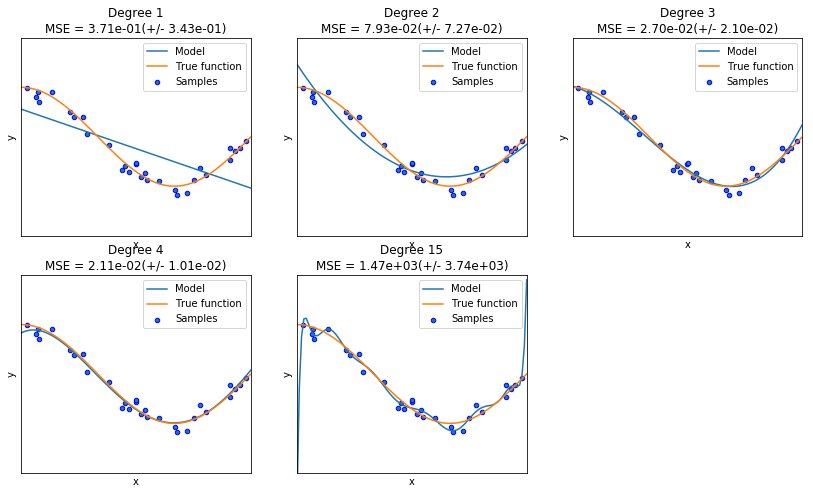

In [7]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(7)

n_samples = 30
degrees = [1, 2, 3, 4, 15]
rows = 2

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 8))
for i in range(len(degrees)):
    ax = plt.subplot(rows, -(len(degrees)//-rows), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [21]:
chi_data = pd.read_csv('transformed_data.csv', index_col=0)
features = list(chi_data.columns)

scaler = StandardScaler()
scaled_chi_data = pd.DataFrame(data=scaler.fit_transform(chi_data), columns=chi_data.columns, index=chi_data.index)

y = scaled_chi_data['total_rides']
X = scaled_chi_data[['is_sat','is_holi','avg_precip','temp_mid','temp_rng',
                  'temp_bs','hum_mid','hum_rng','wind_mid','wind_rng','pres_mid','pres_rng']]


C:\Users\Grazillionaire\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Grazillionaire\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,is_sat,is_holi,avg_precip,temp_mid,temp_rng,temp_bs,hum_mid,hum_rng,wind_mid,wind_rng,pres_mid,pres_rng
2001-01-01,-0.407103,2.299250,-0.334751,-1.663010,-0.260877,1.546079,0.790269,-0.719268,-0.453124,-0.908705,2.273855,-0.210199
2001-01-02,-0.407103,-0.434924,-0.334751,-1.964382,-0.576661,-0.016841,1.121560,-1.353135,-0.453124,-0.908705,2.667140,0.380911
2001-01-03,-0.407103,-0.434924,-0.334751,-1.688124,0.528584,-0.798301,1.535673,-1.353135,0.303745,-0.520768,0.971098,1.045909
2001-01-04,-0.407103,-0.434924,-0.334751,-1.236066,-1.050338,-2.361220,1.784141,-1.828536,0.556034,0.643043,-0.724944,2.745350
2001-01-05,-0.407103,-0.434924,0.797392,-1.085380,-0.418769,2.327539,0.500390,-1.115435,0.682179,0.449075,-1.437773,1.045909
2001-01-06,2.456381,-0.434924,-0.152147,-1.261180,0.054907,-0.016841,0.873092,-1.194669,0.303745,0.255106,-1.167390,0.233133
2001-01-07,-0.407103,2.299250,-0.334751,-1.160723,-0.576661,1.546079,0.790269,-0.560801,-0.074689,-1.102673,-0.675783,0.824243
2001-01-08,-0.407103,-0.434924,-0.334751,-1.487209,-0.734554,-0.798301,0.210511,-0.719268,-0.200834,-1.296642,0.651554,0.085356
2001-01-09,-0.407103,-0.434924,-0.334751,-1.688124,-0.418769,-0.798301,0.748858,-1.115435,0.051455,-0.520768,1.438124,-0.505754
2001-01-10,-0.407103,-0.434924,-0.334751,-1.261180,0.054907,-0.016841,0.500390,-1.115435,0.177600,-1.102673,0.872777,-0.727420


In [83]:
import numpy as np
import pandas as pd
import csv
import math
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statistics import mean, stdev

chi_data = pd.read_csv('transformed_data.csv', index_col=0)
features = list(chi_data.columns)

scaler = StandardScaler()
scaled_chi_data = pd.DataFrame(data=scaler.fit_transform(chi_data), columns=chi_data.columns, index=chi_data.index)

y = scaled_chi_data['total_rides']
X = scaled_chi_data[['is_sat','is_holi','avg_precip','temp_mid','temp_rng',
                  'temp_bs','hum_mid','hum_rng','wind_mid','wind_rng','pres_mid','pres_rng']]

num_folds = 5

kfold = KFold(num_folds, True, 34)
# kfold_split = kfold.split(new_chi_data)

alpha_exps = np.linspace(-2,5,15)
L1L2_ratios = np.linspace(0,1,21)
L1L2_ratios[0] = 0.01
# model_grid = {round(alpha_exp,3):
#               {round(L1L2_ratio,3): [] for L1L2_ratio in L1L2_ratios}
#                   for alpha_exp in alpha_exps}

grid = {round(alpha_exp,3):
            {round(L1L2_ratio,3): 
                {'models': [],
                 'MSEs': [],
                 'RMSEs': [],
                 'resids': [],
                 'training_scores': [],
                 'test_scores': []}
                    for L1L2_ratio in L1L2_ratios}
                        for alpha_exp in alpha_exps}


for alpha_exp in grid:
    alpha = pow(10,alpha_exp)
    for L1L2_ratio in grid[alpha_exp]:
        # experiment = grid[alpha_exp][L1L2_ratio]
        # print(f'running experiment with alpha_exp={alpha_exp} and L1L2_ratio={L1L2_ratio}')
        for train, test in kfold.split(y):
            # print(len(train), len(test))
            X_train = X.iloc[train]
            X_test = X.iloc[test]
            y_train = y.iloc[train]
            y_test = y.iloc[test]

            model = ElasticNet(alpha=alpha, l1_ratio=L1L2_ratio, random_state=34)
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            resids = [y_p - y_t for y_p, y_t in zip(y_pred,y_test)]
            mse = mean_squared_error(y_test, y_pred)
            rmse = math.sqrt(mse)

            training_score = model.score(X_train, y_train)
            test_score = model.score(X_test, y_test)

            grid[alpha_exp][L1L2_ratio]['models'].append(model)
            grid[alpha_exp][L1L2_ratio]['MSEs'].append(mse)
            grid[alpha_exp][L1L2_ratio]['RMSEs'].append(rmse)
            grid[alpha_exp][L1L2_ratio]['resids'].append(resids)
            grid[alpha_exp][L1L2_ratio]['training_scores'].append(training_score)
            grid[alpha_exp][L1L2_ratio]['test_scores'].append(test_score)
    

C:\Users\Grazillionaire\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Grazillionaire\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [77]:
def contour_plot(x_values, y_values, z_values, levels=None):
    plt.title('Contour plot')
    plt.xlabel('X')
    plt.ylabel('Y')

    if levels:
        # Create contour lines or level curves using matplotlib.pyplot module
        contours = plt.contour(x_values, y_values, z_values, levels)
    else:
        contours = plt.contour(x_values, y_values, z_values)

    # Display z values on contour lines
    plt.clabel(contours, inline=1, fontsize=10)

    plt.show()
    

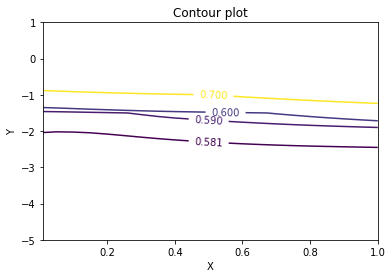

In [81]:
y_values = alpha_exps
x_values = L1L2_ratios
z_values = np.ndarray((len(y_values),len(x_values)))

x_counter = 0
for alpha_exp in grid:
    y_counter = 0
    for L1L2_ratio in grid[alpha_exp]:
        data = grid[alpha_exp][L1L2_ratio]['MSEs']
        z_values[x_counter][y_counter] = sum(data)
        y_counter += 1
    x_counter += 1

levels = [0.3, 0.6, 0.7, 0.8, 0.85, 0.87, 0.88, 0.89, 0.9]
levels = [0.581, 0.59, 0.6, 0.7]
contour_plot(x_values, y_values, z_values, levels)

Index(['bus', 'rail_boardings', 'total_rides', 'is_sat', 'is_holi',
       'avg_precip', 'temp_mid', 'temp_rng', 'temp_bs', 'hum_mid', 'hum_rng',
       'wind_mid', 'wind_rng', 'pres_mid', 'pres_rng'],
      dtype='object')


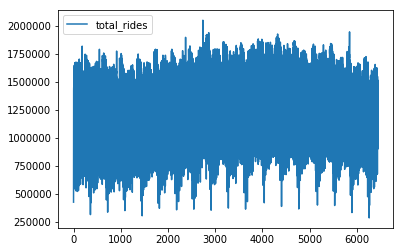

In [124]:
print(chi_data.columns)
chi_data['total_rides'].iloc[::].reset_index().plot()

6450 3225


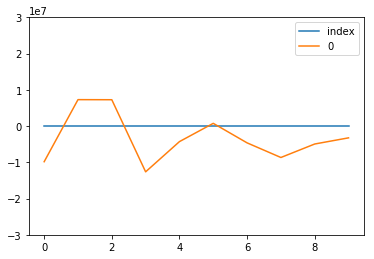

In [112]:
series = pd.Series(np.fft.fft(chi_data['total_rides']))
print(len(series), len(series)//2)
new_series = series.iloc[len(series)//2:].reset_index().iloc[:10]
new_series.plot(ylim=(-3e7,3e7))

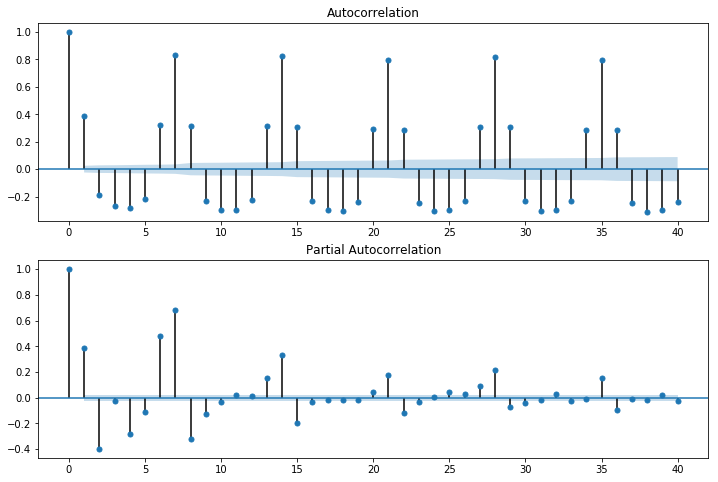

In [90]:
import statsmodels.api as sm
# import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(chi_data['total_rides'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(chi_data['total_rides'], lags=40, ax=ax2)
plt.show()

In [27]:
# scaler.inverse_transform(X and y...)


y_values = alpha_exps
x_values = L1L2_ratios
z_values = np.ndarray((len(x_values),len(y_values)))

x_counter = 0
for alpha_exp in grid:
    y_counter = 0
    for L1L2_ratio in grid[alpha_exp]:
        data = grid[alpha_exp][L1L2_ratio]['test_scores']
        z_values[x_counter][y_counter] = mean(data)
        _counter += 1
    x_counter += 1

contour_plot(x_values, y_values, z_values)

{-2.0: {0.01: 0.8837456437589574,
  0.05: 0.8837502180461448,
  0.1: 0.883748171749512,
  0.15: 0.8837423169662276,
  0.2: 0.8837303052751262,
  0.25: 0.883713879296133,
  0.3: 0.8836927146059499,
  0.35: 0.8836667659410551,
  0.4: 0.8836371046751018,
  0.45: 0.8836040131492812,
  0.5: 0.8835671931176851,
  0.55: 0.8835261122894993,
  0.6: 0.8834810107086535,
  0.65: 0.8834324149388022,
  0.7: 0.8833800709880442,
  0.75: 0.8833240570781479,
  0.8: 0.8832687241664194,
  0.85: 0.88321583567098,
  0.9: 0.8831600983303501,
  0.95: 0.8831008940208636,
  1.0: 0.8830382959064152},
 -1.5: {0.01: 0.8826703755954595,
  0.05: 0.8826197949650039,
  0.1: 0.8825168562297896,
  0.15: 0.8823783659144834,
  0.2: 0.8822031218026415,
  0.25: 0.8819988395437267,
  0.3: 0.8817881533906166,
  0.35: 0.8815471434022994,
  0.4: 0.8813136699556752,
  0.45: 0.8811046680955348,
  0.5: 0.8808792025869594,
  0.55: 0.8806358526176649,
  0.6: 0.8803739746952095,
  0.65: 0.8800943879011239,
  0.7: 0.8797969696530974,


In [6]:
import statistics
dir(statistics)

['Decimal',
 'Fraction',
 'StatisticsError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_coerce',
 '_convert',
 '_counts',
 '_exact_ratio',
 '_fail_neg',
 '_find_lteq',
 '_find_rteq',
 '_isfinite',
 '_ss',
 '_sum',
 'bisect_left',
 'bisect_right',
 'collections',
 'groupby',
 'harmonic_mean',
 'math',
 'mean',
 'median',
 'median_grouped',
 'median_high',
 'median_low',
 'mode',
 'numbers',
 'pstdev',
 'pvariance',
 'stdev',
 'variance']

In [20]:
len(scaled_chi_data[:,0:3])

6450

In [127]:
# define helper plot function for visualization
import statsmodels.tsa.api as smt
import seaborn as sns

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

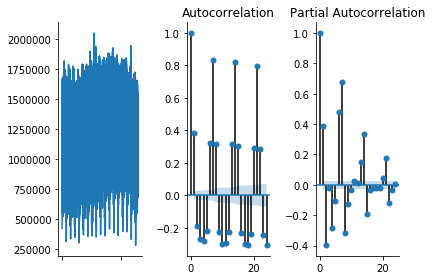

In [128]:
plots(chi_data['total_rides'], lags=24);

In [130]:
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(chi_data['total_rides'], order=(1,1,0), seasonal_order=(0,1,0,7), trend='c').fit()
sar.summary()

C:\Users\Grazillionaire\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                       total_rides   No. Observations:                 6450
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 7)   Log Likelihood              -88670.269
Date:                           Sun, 01 Sep 2019   AIC                         177346.537
Time:                                   15:44:18   BIC                         177366.849
Sample:                                        0   HQIC                        177353.566
                                          - 6450                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -76.4678   2861.564     -0.027      0.979   -5685.031    5532.095
ar.L1         -0.3363      0.007    -50.588      0.000      -0.349      -0.323
sigma2       5.28e+10      0.001   7.65e+13      0.000    5.28e+10    5.28e+10
===================================================================================
Ljung-Box (Q):                     2218.43   Jarque-Bera (JB):             18234.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.11
Prob(H) (two-sided):                  0.63   Kurtosis:                        11.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+29. Standard errors may be unstable.
"""